In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp

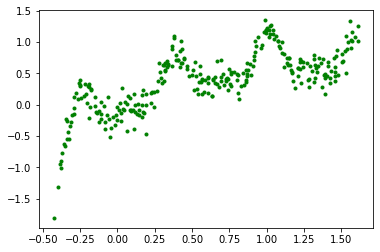

In [53]:
x = np.linspace(0,2,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.05, x.shape)*3
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [54]:
max_points = 10
lr=0.1
spline = tsp.Spline1D(2, x, y)
spline.n_max = max_points
# spline = tsp.Spline1D(max_points, x, y)

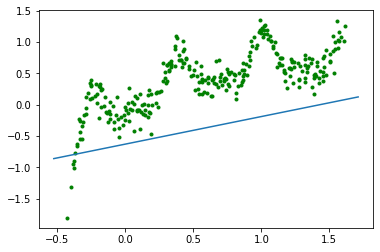

In [55]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y)

_______________________
Steps 0
Error 0.6822793083107941


_______________________
Steps 50
Error 0.08943939792485513


_______________________
Steps 100
Error 0.0830238353158272


_______________________
Steps 150
Error 0.07932810284469777


_______________________
Steps 200
Error 0.07846140363727663


_______________________
Steps 250
Error 0.07585062917534513


_______________________
Steps 300
Error 0.07456748625425437


_______________________
Steps 350
Error 0.07289442134066745


_______________________
Steps 400
Error 0.07034799332142126


_______________________
Steps 450
Error 0.051649975425528634


_______________________
Steps 500
Error 0.04678437216674125


_______________________
Steps 550
Error 0.0365652390178318


_______________________
Steps 600
Error 0.03312326571223925


_______________________
Steps 650
Error 0.02869606208559594


_______________________
Steps 700
Error 0.027887336619627376


_______________________
Steps 750
Error 0.023811394312398548


___________

TclError: invalid command name "."

Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "/home/tsuman/Program_Files/Python/miniconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1530, in _draw
    def _draw(renderer): raise D

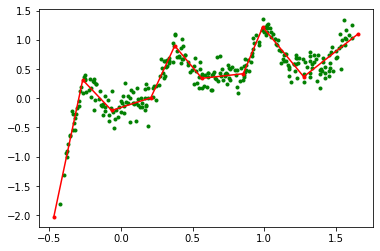

In [56]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):

#     Y = spline.forward(x) + x
    Y = spline.forward(x)
    
    dy = Y-y
    dx = spline.backward(dy)
#     dx = spline.backward(dy) + dy
    spline.update(lr)
    
    if step % 100 == 0:# and step!=0:
        spline._remove_close_points_()
        spline._combine_linear_points_()
        spline._remove_no_input_points_()
        spline._add_new_point_()
        
    if step % 50 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(spline.X, spline.Y, marker='.', color='r')
#         plt.plot(spline.X, spline.Y+spline.X, marker='.', color='r')
#         plt.scatter(x, dx, marker='.', color='c')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [ ]:
# spline.n_max +=1

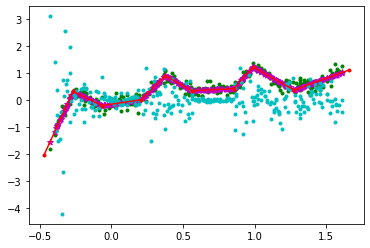

In [57]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')
# Y = spline.forward(x) + x
Y = spline.forward(x)
plt.scatter(x, Y, marker='*', color='m')
plt.scatter(x, dx, marker='.', color='c')

## converting to quadratic

In [91]:
def forward(self:tsp.Spline1D,input):
    self.input = input
    self.preprocess()

    indx_range = np.argmax(self.rangeX, axis=0)
    
    output = np.zeros_like(self.input)
    for i in range(1,self.n_points-2):
        Y_ = self.diffY[i]/self.diffX[i] *(self.input - self.X[i]) + self.Y[i]

        sprev = (indx_range==i-1)*0.5*(self.input-self.X[i-1])/(self.X[i] - self.X[i-1])
        snext = (indx_range==i+1)*0.5*(self.input-self.X[i+2])/(self.X[i+1] - self.X[i+2])
        snow = (indx_range==i)*0.5
        Y_ = Y_*(sprev+snext+snow)
        output += Y_

    ## for index 0
    Y_ = self.diffY[0]/self.diffX[0] *(self.input - self.X[0]) + self.Y[0]
    
    snow = (indx_range==0)*(0.5*(self.input-self.X[1])/(self.X[0] - self.X[1])+0.5)
    snext = (indx_range==1)*0.5*(self.input-self.X[2])/(self.X[1] - self.X[2])
    Y_ = Y_*(snow+snext)
    output += Y_

    ## for index -1
    i = self.n_points-2
    Y_ = self.diffY[i]/self.diffX[i] *(self.input - self.X[i]) + self.Y[i]
    sprev = (indx_range==i-1)*0.5*(self.input-self.X[i-1])/(self.X[i] - self.X[i-1])
    snow = (indx_range==i)*(0.5*(self.input-self.X[i])/(self.X[i+1] - self.X[i])+0.5)
    Y_ = Y_*(sprev+snow)
    output += Y_
        
    
    self.output = output
    return self.output

In [92]:
yout = forward(spline, x)

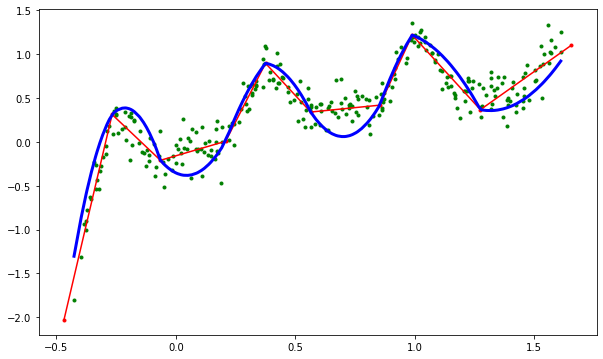

In [93]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='.', color='r')
plt.plot(x, yout, lw=3, color='b')

## scaling in non-linear way

In [ ]:
def forward(self:tsp.Spline1D,input):
    self.input = input
    self.preprocess()

    indx_range = np.argmax(self.rangeX, axis=0)
    
    output = np.zeros_like(self.input)
    for i in range(1,self.n_points-2):
        Y_ = self.diffY[i]/self.diffX[i] *(self.input - self.X[i]) + self.Y[i]

        sprev = (indx_range==i-1)*0.5*(self.input-self.X[i-1])/(self.X[i] - self.X[i-1])
        snext = (indx_range==i+1)*0.5*(self.input-self.X[i+2])/(self.X[i+1] - self.X[i+2])
        snow = (indx_range==i)*0.5
        Y_ = Y_*(sprev+snext+snow)
        output += Y_

    ## for index 0
    Y_ = self.diffY[0]/self.diffX[0] *(self.input - self.X[0]) + self.Y[0]
    
    snow = (indx_range==0)*(0.5*(self.input-self.X[1])/(self.X[0] - self.X[1])+0.5)
    snext = (indx_range==1)*0.5*(self.input-self.X[2])/(self.X[1] - self.X[2])
    Y_ = Y_*(snow+snext)
    output += Y_

    ## for index -1
    i = self.n_points-2
    Y_ = self.diffY[i]/self.diffX[i] *(self.input - self.X[i]) + self.Y[i]
    sprev = (indx_range==i-1)*0.5*(self.input-self.X[i-1])/(self.X[i] - self.X[i-1])
    snow = (indx_range==i)*(0.5*(self.input-self.X[i])/(self.X[i+1] - self.X[i])+0.5)
    Y_ = Y_*(sprev+snow)
    output += Y_
        
    
    self.output = output
    return self.output